In [ ]:
def train_model(model, 
                loss_func,
                optimizer,
                x_train,
                y_train, 
                x_test,
                y_test,
                num_epoches,
                inference_mode_interval):

    torch.manual_seed(42)
    train_loss_values = []
    test_loss_values = []
    epoch_count = []

    for num_epoch in range(num_epoches):

        # Put model in training mode(this is default state of a model)
        model.train()

        # 1. Forward pass on train data using the forward() method inside
        y_pred_train = model(X_train)    

        # 2. Calculate the loss for train values
        train_loss = loss_func(y_pred_train, y_train)

        # 3. Zero gradients of the optimizer(they accumulete by default)
        optimizer.zero_grad()

        # 4. Perform backpropagation on the loss, a.k. the computation of step value for each parameter, using the back propagation
        train_loss.backward()

        # 5. Progress/step the optimizer (gradient descent)
        optimizer.step()

        model.eval()
            
        with torch.inference_mode():
            
            y_pred_test = model(X_test)
            test_loss = loss_func(y_pred_test, y_test)

            if num_epoch % inference_mode_interval == 0:

                test_loss = loss_func(y_pred_test, y_test)
    
                test_loss_values.append(test_loss)
                train_loss_values.append(train_loss)
                
                print(f'epoch number: {num_epoch} | train_loss: {train_loss} | test_loss: {test_loss}')

    return train_loss_values ,test_loss_values, epoch_count

In [146]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [147]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Create a straight line dataset using the linear regression formula (a * X + c).

In [148]:
weight = 0.3
bias = 0.9

In [169]:
x_points = [x/200 for x in range(200)]

In [171]:
x_points = torch.tensor(x_points )
y_points = torch.tensor([round(x * a + c, 2) for x in range(200)])

In [172]:
X_train, X_test, y_train, y_test  = test_train_split(x_points, y_points, 0.8)

In [173]:
len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [174]:
X_train[:10], y_train[:10]

(tensor([0.0000, 0.0050, 0.0100, 0.0150, 0.0200, 0.0250, 0.0300, 0.0350, 0.0400,
         0.0450]),
 tensor([0.9000, 1.2000, 1.5000, 1.8000, 2.1000, 2.4000, 2.7000, 3.0000, 3.3000,
         3.6000]))

In [175]:
def plot_train_test_predicted(x_train, x_test, y_train, y_test, predicted = None):
    plt.figure(figsize=(8, 5))
    plt.scatter(x=x_train, y=y_train, c='b', s=4, label='train_data')
    plt.scatter(x=x_test, y=y_test, c='y', s=4, label='test_data')
    if predicted is not None:
        plt.scatter(x=x_test, y=predicted, c='black',s=4, label='predicted_data')
    plt.legend();
    

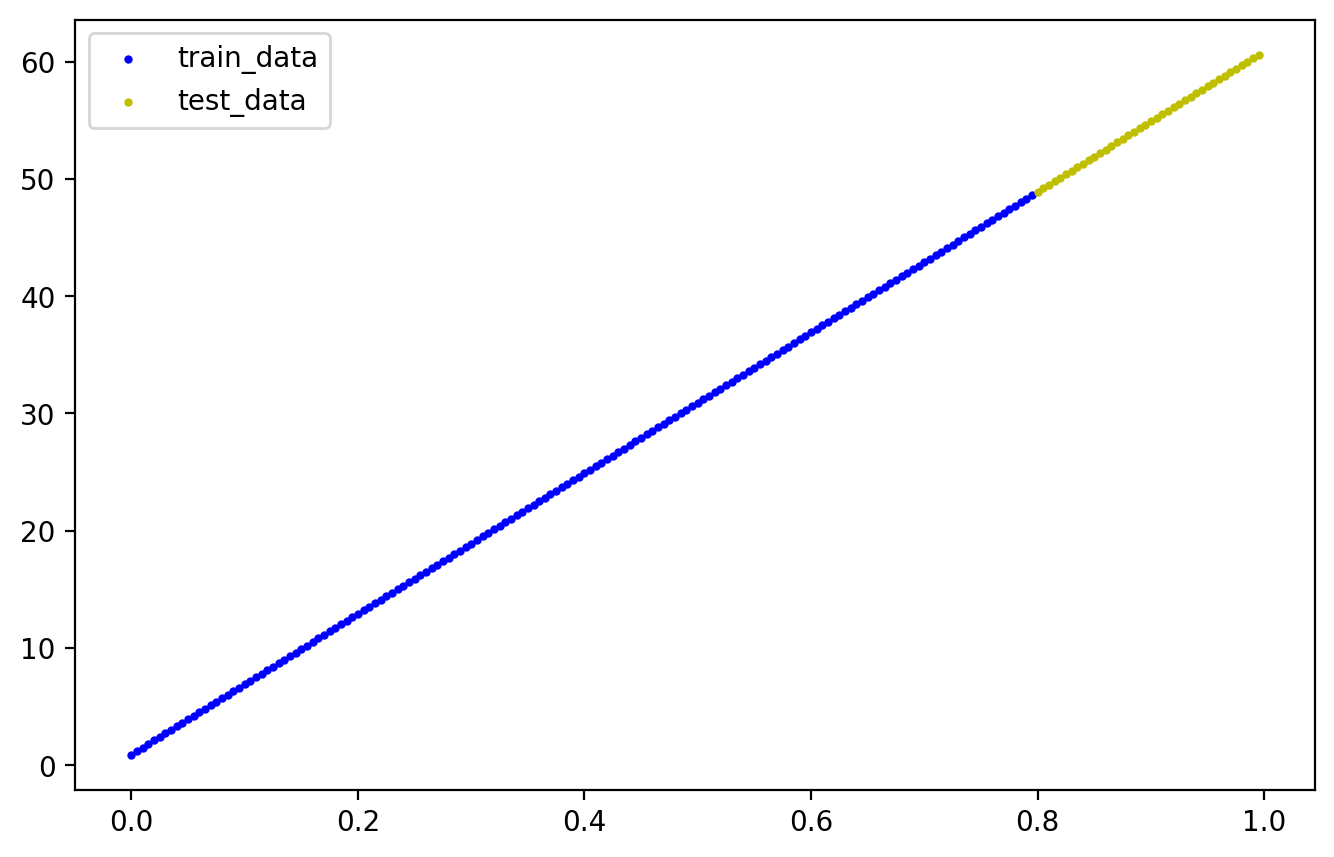

In [176]:
plot_train_test_predicted(x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test)

## 2. Build a PyTorch model by subclassing nn.Module.

In [177]:
# my linear regression is like y = a(bi) + c

In [178]:
class MyLinearRegression(nn.Module):

    def __init__(self):

        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:

        # y = a(bi) + c
        return self.weight * x + self.bias
        

In [179]:
torch.manual_seed(42)

my_model_1 = MyLinearRegression()
list(my_model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [180]:
my_model_1.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [181]:
with torch.inference_mode():
    prediction_1 = my_model_1.forward(X_test)

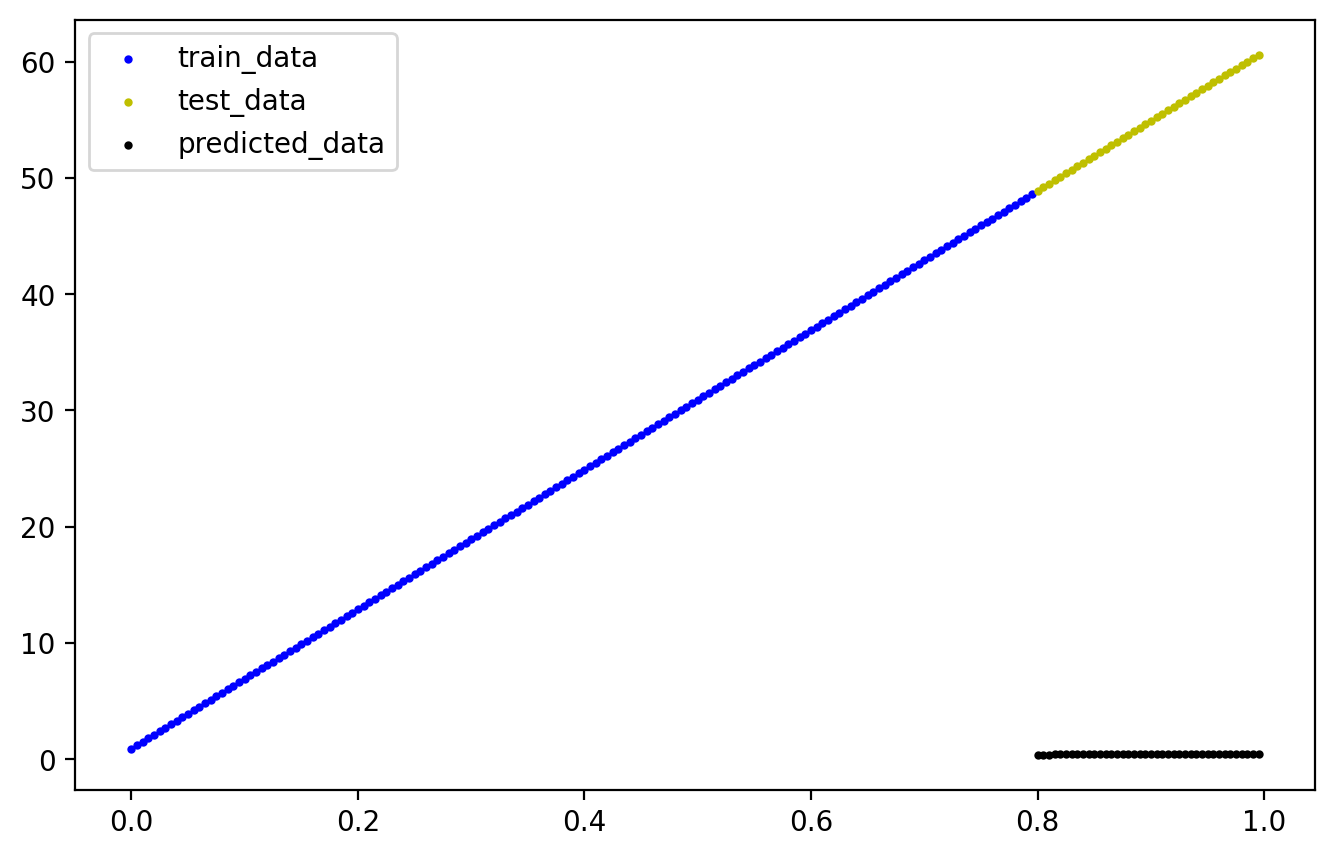

In [182]:
plot_train_test_predicted(x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test, predicted=prediction_1)

## 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [183]:
l1_loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=my_model_1.parameters(), lr=0.01)

In [184]:
torch.manual_seed(42)

epochs = 300
inference_mode_interval = 20

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    my_model_1.train()

    y_pred = my_model_1(X_train)

    loss = l1_loss(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    my_model_1.eval()

    with torch.inference_mode():

        test_pred = my_model_1(X_test)

        test_loss = l1_loss(test_pred, y_test.type(torch.float))

        if epoch % inference_mode_interval == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss {test_loss}')


Epoch: 0 | MAE Train Loss: 24.487354278564453 | MAE Test Loss 54.30543899536133
Epoch: 20 | MAE Train Loss: 24.255756378173828 | MAE Test Loss 54.034088134765625
Epoch: 40 | MAE Train Loss: 24.024152755737305 | MAE Test Loss 53.76274490356445
Epoch: 60 | MAE Train Loss: 23.792552947998047 | MAE Test Loss 53.49138641357422
Epoch: 80 | MAE Train Loss: 23.56155776977539 | MAE Test Loss 53.22041702270508
Epoch: 100 | MAE Train Loss: 23.33492660522461 | MAE Test Loss 52.951560974121094
Epoch: 120 | MAE Train Loss: 23.11135482788086 | MAE Test Loss 52.6843376159668
Epoch: 140 | MAE Train Loss: 22.89020347595215 | MAE Test Loss 52.41838455200195
Epoch: 160 | MAE Train Loss: 22.673351287841797 | MAE Test Loss 52.154563903808594
Epoch: 180 | MAE Train Loss: 22.45940399169922 | MAE Test Loss 51.89239501953125
Epoch: 200 | MAE Train Loss: 22.247638702392578 | MAE Test Loss 51.63136672973633
Epoch: 220 | MAE Train Loss: 22.040355682373047 | MAE Test Loss 51.37261962890625
Epoch: 240 | MAE Train Lo

In [168]:
[1, 2, 3]

TypeError: unsupported operand type(s) for /: 'list' and 'int'